# Steve Groves: Capstone Project

## Notebook 1: What is the Top Complaint Type?


### Step 1: Read the Service Request Data in to a Pandas Dataframe

In [1]:
# Import pandas library
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
# Filename = "311_Service_Requests_from_2010_to_Present - HDP Only_1000.csv"    # Sample test file for notebook creation
Filename = "311_Service_Requests_from_2010_to_Present - HDP Only.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
cap_df = pd.read_csv(Infile,parse_dates=['Created Date','Closed Date'])

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()
cap_df.head(2)



Data Load - start Time:  2019-11-19 11:53:54.696914
Data Load - Finish Time:  2019-11-19 11:57:34.367187
Data load time is: 0:03:39.670273


,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,15716674,2010-01-12,2010-02-08,PLUMBING,RADIATOR,RESIDENTIAL BUILDING,11230.0,1001 AVENUE H,AVENUE H,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.629459,-73.966928
1,15716675,2010-01-12,2010-01-15,HEATING,HEAT,RESIDENTIAL BUILDING,10456.0,1400 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Closed,More than one complaint was received for this ...,Unspecified,40.838031,-73.911282


### Step 2: Explore the basic shape and format of the data

The previous cell showed that the data has been read in to the pandas dataframe and looks correct, but we need to understand the size of the data set as well as the types of each of the fields (especially in relation to the date/time fields and whether they have been parsed as datefime fields

In [2]:
# Obtain the year and month of the complaint ready for later use
cap_df['Created Year'] = pd.DatetimeIndex(cap_df['Created Date']).year
cap_df['Created Month'] = pd.DatetimeIndex(cap_df['Created Date']).month

print('Number of complaints is: ' + str(cap_df.shape[0]))
print('Number of features is:   ' + str(cap_df.shape[1]))
print('\n---------------------------')
print('Data Types are:')
cap_df.dtypes

Number of complaints is: 5909958
Number of features is:   18

---------------------------
Data Types are:


Unique Key                         int64
Created Date              datetime64[ns]
Closed Date               datetime64[ns]
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                     float64
Incident Address                  object
Street Name                       object
Address Type                      object
City                              object
Status                            object
Resolution Description            object
Borough                           object
Latitude                         float64
Longitude                        float64
Created Year                       int64
Created Month                      int64
dtype: object

<font color=blue>There are 18 columns of data and 590995 (approx 6 million) complaint records. <br/>
Apart from the two date/time fields, along with the Unique Key, Zip code and Lat/Long locations, all other fields in the data set are of type object (string).</font>



### Step 3: Analysing Complaint Types

#### Step 3.1: Which is the most common Complaint Type?

In [3]:
# Create an aggregation of complaints by type to give a frequency count of complaint types
series = cap_df['Complaint Type'].value_counts()
series.head(35)

HEAT/HOT WATER            1182468
HEATING                    887869
PLUMBING                   706170
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       443913
PAINT - PLASTER            361258
PAINT/PLASTER              343352
ELECTRIC                   305095
NONCONST                   260890
DOOR/WINDOW                202263
WATER LEAK                 190463
GENERAL                    148574
FLOORING/STAIRS            136256
APPLIANCE                  111097
HPD Literature Request      52830
SAFETY                      50725
OUTSIDE BUILDING             7079
ELEVATOR                     6573
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric      

<font color=blue>There are lots of complaint types with small numbers of complaints, so let's group some of these smaller categories in to an "Other" category so that visualisations are easier to understand.</font>

In [4]:
# There are lots of complaint types with small numbers of complaints, so let's group these in to an "Other" category

mask = (series/series.sum() * 100).lt(3)
cap_df['Complaint Type top'] = np.where(cap_df['Complaint Type'].isin(series[mask].index),'Other',cap_df['Complaint Type'])
series_top = cap_df['Complaint Type top'].value_counts()
series_top.head(35)

HEAT/HOT WATER          1182468
HEATING                  887869
PLUMBING                 706170
Other                    525354
GENERAL CONSTRUCTION     500863
UNSANITARY CONDITION     443913
PAINT - PLASTER          361258
PAINT/PLASTER            343352
ELECTRIC                 305095
NONCONST                 260890
DOOR/WINDOW              202263
WATER LEAK               190463
Name: Complaint Type top, dtype: int64

<font color=blue>A new data column has been created which keeps just the top 12 complaint types of which one of those twelve is the group "Other" containing all the remaining complaints.</font>

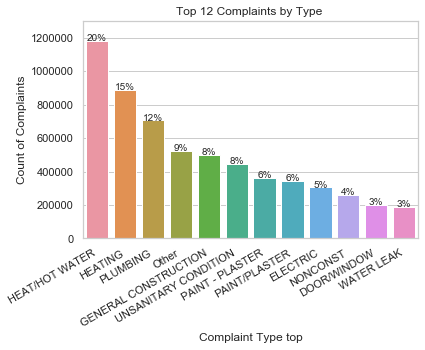

In [5]:
# Create a visualisation of the top 12 complaint types
g1 = sns.countplot(data=cap_df, x='Complaint Type top',order = cap_df['Complaint Type top'].value_counts().index)
plt.title('Top 12 Complaints by Type ')
plt.ylabel('Count of Complaints')
plt.ylim(0, 1300000)

g1.set_xticklabels(g1.get_xticklabels(), rotation=30, ha="right")

#Add percentages to the graph
total = float(len(cap_df)) #one person per row
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{0:.0%}'.format(height/total),
            ha="center") 

plt.show()

<font color=blue>As "Heat/Hot Water" seems to be the largest complaint type, let's investigage what heating and hot water issues issues people are having</font>


#### Step 3.2: Which descriptors relate to heating and hot water issues?

In [6]:
# Obtain a list of all descriptors in the data set, regardless of whether they relating to heating and hot water
top_descriptors = cap_df['Descriptor'].value_counts()
top_descriptors.head(20)

HEAT                         871935
ENTIRE BUILDING              771490
APARTMENT ONLY               410978
CEILING                      341558
MOLD                         247377
FLOOR                        232039
PESTS                        219510
VERMIN                       187360
WATER-LEAKS                  169571
WALLS                        168471
WALL                         167339
BASIN/SINK                   152262
DOOR                          95516
HEAVY FLOW                    90804
WINDOWS                       89729
DOORS                         77186
SLOW LEAK                     75107
WINDOW FRAME                  74606
TOILET                        73329
GARBAGE/RECYCLING STORAGE     72660
Name: Descriptor, dtype: int64

<font color=blue>Some of these descriptors clearly do not relate to heating issues so we will select just hte records relating to heading and look at the descriptors for those</font>


In [7]:
# Create a new dataframe containing just records relating to heating issues
heating_df = cap_df[cap_df['Complaint Type'].str.contains('HEAT/HOT WATER')]
heating_df_2var = heating_df[['Complaint Type','Descriptor']]

# Create a cross-tab (pivot table) of descriptors that relating to HEATING issues
heating_df_2var.pivot_table(index='Complaint Type', columns='Descriptor', aggfunc=len).fillna(0).astype('int')

Descriptor,APARTMENT ONLY,ENTIRE BUILDING
Complaint Type,,
HEAT/HOT WATER,410978,771490


<font color=blue>There are only two descriptors releating to HEAT / HOT WATER issues and we can see that almost 2/3 of the time they relete to the Entire Building and not an individual apartment</font>


#### Step 3.3: Have heatings complaints become more common over the years?

In [8]:
heating_df.head(3)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude,Created Year,Created Month,Complaint Type top
2594842,27611774,2014-03-11,2014-03-13,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11216.0,551 NOSTRAND AVENUE,NOSTRAND AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.678626,-73.949663,2014,3,HEAT/HOT WATER
2594843,27611775,2014-03-11,2014-03-14,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,11432.0,87-77 169 STREET,169 STREET,ADDRESS,Jamaica,Closed,The Department of Housing Preservation and Dev...,QUEENS,40.710473,-73.792888,2014,3,HEAT/HOT WATER
2594844,27611776,2014-03-11,2014-03-13,HEAT/HOT WATER,APARTMENT ONLY,RESIDENTIAL BUILDING,10031.0,524 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.825595,-73.948489,2014,3,HEAT/HOT WATER


In [9]:
heat_by_year = heating_df['Created Year'].value_counts().sort_index()
heat_by_year.head(20)

2014    132767
2015    225706
2016    227959
2017    213521
2018    223835
2019    158680
Name: Created Year, dtype: int64

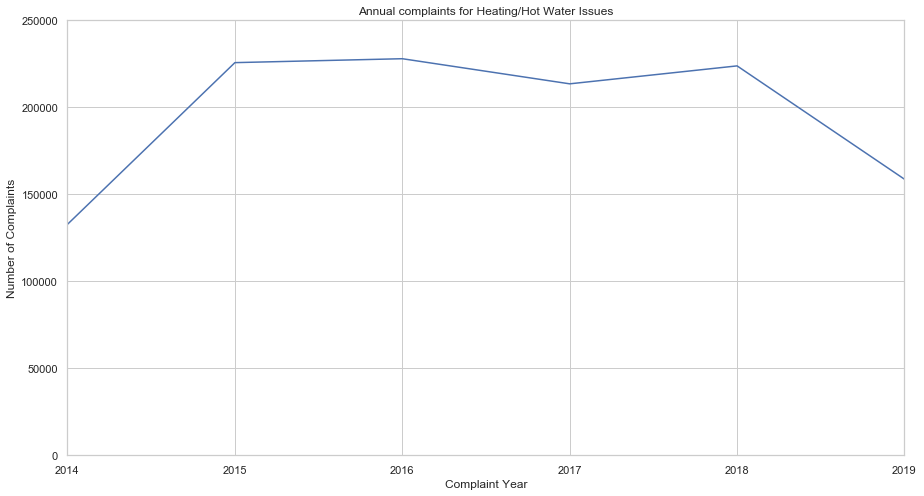

In [10]:
plt.figure(figsize=(15,8))
plt.title('Annual complaints for Heating/Hot Water Issues')
plt.ylabel('Number of Complaints')
plt.xlabel('Complaint Year')
plt.ylim(0, 250000)
heat_by_year = heating_df['Created Year'].value_counts().sort_index()[:20].plot(kind='line')


<font color=blue>Whilst there has been some variation in the number of "Heat/HotWater" complaints over the last 5 years, there doesn't seem to be an increasing trend</font>


## Conclusion:

In [11]:
top_complaint = cap_df['Complaint Type'].value_counts().index.values[0]
top_complaint_value = cap_df['Complaint Type'].value_counts().nlargest(n=1).values[0]
print(top_complaint, "is the highest complaint type within the DHP of New York City,\n with a total of", top_complaint_value, "complaints since 2010.")

HEAT/HOT WATER is the highest complaint type within the DHP of New York City,
 with a total of 1182468 complaints since 2010.


<font color=blue>
After accessing the data, the first task was to understand how much data there was and what shape the data was in. <br><br>
The key field for analysis was "Complaint Type" and ultimately we just needed to perform a frequency count on this and find the complaint type with the hightest frequency.<br><br>
After the frequencies were calculated, it seemed appropriate to provide graphical respresentations of those frequencies, in order to get an idea of the difference in magnitude of the complaint types, as well as perform some further analysis around whether this has been a complaint type growing in frequency or whether it has been consistently high
</font>
